# Introduction to Pytorch

In [22]:
print("Introduction to Pytorch - Pytorch Youtube series")

Introduction to Pytorch - Pytorch Youtube series


### Pytorch Tensors

In [23]:
import torch
import torch.nn as nn               # 
import torch.nn.functional as F     # for the activation function

In [24]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)

        # affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)   # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [25]:
net = LeNet()
print(net)

input = torch.rand(1,1,32,32)
print(f'\n Image Batch Shape: {input.shape}')

output = net(input)
print(f"\n Raw Output: {output} \nShape: {output.shape}")


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

 Image Batch Shape: torch.Size([1, 1, 32, 32])

 Raw Output: tensor([[-0.0141, -0.0698, -0.1006,  0.1091, -0.0276, -0.0615, -0.0511,  0.0734,
          0.0177, -0.0383]], grad_fn=<AddmmBackward0>) 
Shape: torch.Size([1, 10])


## Datasets and DataLoaders

In [26]:
# matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.4914,0.4822,0.4465), (0.2470,0.2435,0.2616))
    ]
)

In [27]:
from torch.utils.data import ConcatDataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root="./data", train=True,
                    download=True, transform=transform)

# Stack all train images together into a tensor of shape (50000, 3, 32, 32)
x = torch.stack([sample[0] for sample in ConcatDataset([trainset])])

# get the mean of each channels
mean = torch.mean(x, dim=(0,2,3))   
print(mean)

std = torch.std(x, dim=(0,2,3))

tensor([0.4914, 0.4822, 0.4465])


Once your dataset is ready, we can give it to the DataLoader

In [28]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

A Dataset subclass wraps access to the data, and is specialized to the type of data it’s serving. The DataLoader knows nothing about the data, but organizes the input tensors served by the Dataset into batches with the parameters you specify.

 bird  frog  frog  frog


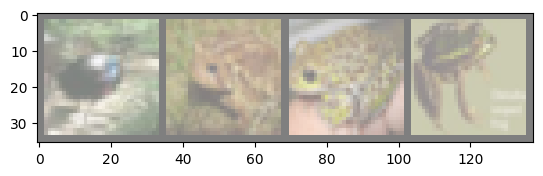

In [29]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car','bird','cat','deer','dog','frog','horse','ship','truck')

def imshow(img):
    img = img/2 + 0.5       # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' %classes[labels[j]] for j in range(4)))

## Training our Pytorch Model

In [30]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [31]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
    ]
)
trainset = torchvision.datasets.CIFAR10(root="./data", train=True,
                download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('plane','car','bird','cat','derr','dog','frog','horse','ship','truck')

 derr plane horse  frog


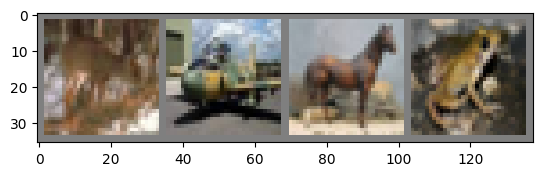

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Functions to show an image
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Building the model

In [33]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

net = Net()

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [35]:
for epoch in range(20):  # loop over the dataset mulitple times
    running_loss = 0.0
    for i,data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999 :      # print every 2000 mini batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 3.251
[1,  4000] loss: 1.934
[1,  6000] loss: 1.623
[1,  8000] loss: 1.518
[1, 10000] loss: 1.468
[1, 12000] loss: 1.409
[2,  2000] loss: 1.333
[2,  4000] loss: 1.294
[2,  6000] loss: 1.291
[2,  8000] loss: 1.298
[2, 10000] loss: 1.260
[2, 12000] loss: 1.248
[3,  2000] loss: 1.183
[3,  4000] loss: 1.168
[3,  6000] loss: 1.163
[3,  8000] loss: 1.180
[3, 10000] loss: 1.163
[3, 12000] loss: 1.134
[4,  2000] loss: 1.080
[4,  4000] loss: 1.078
[4,  6000] loss: 1.080
[4,  8000] loss: 1.115
[4, 10000] loss: 1.070
[4, 12000] loss: 1.090
[5,  2000] loss: 0.992
[5,  4000] loss: 1.009
[5,  6000] loss: 1.017
[5,  8000] loss: 1.052
[5, 10000] loss: 1.025
[5, 12000] loss: 1.043
[6,  2000] loss: 0.949
[6,  4000] loss: 0.950
[6,  6000] loss: 0.951
[6,  8000] loss: 1.005
[6, 10000] loss: 0.992
[6, 12000] loss: 0.978
[7,  2000] loss: 0.876
[7,  4000] loss: 0.896
[7,  6000] loss: 0.934
[7,  8000] loss: 0.956
[7, 10000] loss: 0.934
[7, 12000] loss: 0.964
[8,  2000] loss: 0.833
[8,  4000] 

In [36]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on 10000 test images: %d %%' % (100 * correct/total))

Accuracy of the network on 10000 test images: 60 %
